In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

print("Path to dataset files:", path)

/home/jangcha/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.17G/3.17G [01:24<00:00, 40.3MB/s]

Extracting files...


Path to dataset files: /home/jangcha/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2


In [7]:
# Word Embeddings : Word2Vec and GloVe

## Section 1: Load Pretrained Word2Vec

from gensim.models import KeyedVectors

# Load the Google News Word2Vec model (you need to download it separately)
model_path = '/home/jangcha/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print(model['king'])

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [8]:


## Section 2: Semantic Similarity and Analogies

# Examples 
print(model.most_similar('king'))
print(model.similarity('king', 'queen'))
print(model.doesnt_match(['breakfast', 'cereal', 'dinner', 'car']))

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
0.6510957
car


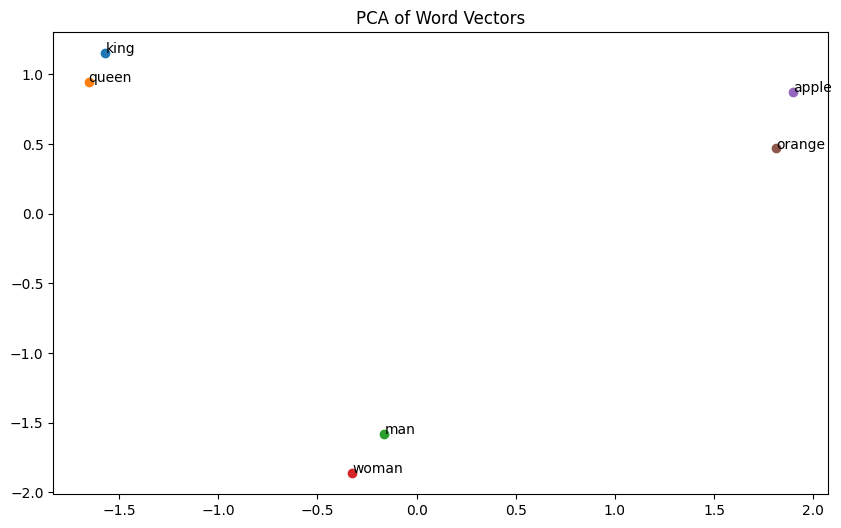

In [9]:
## Section 3: Visualize Embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example 
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange']
word_vectors = [model[word] for word in words]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10,6))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title('PCA of Word Vectors')
plt.show()

In [12]:
## Section 4: Train Your Own Word2Vec

from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
    ['i', 'love', 'machine', 'learning'],
    ['word', 'embeddings', 'capture', 'semantic', 'meaning'],
]
# Texts to classify (we'll add this to training data)
texts = [
    ['i', 'love', 'this', 'movie'],
    ['this', 'film', 'was', 'awful'],
    ['amazing', 'cinematography'],
    ['poor', 'script', 'and', 'bad', 'acting']
]

# Add texts to training data
sentences += texts

# Train Word2Vec model
model_own = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=2)

# Print vector and similarity
print(model_own.wv['fox'])
print(model_own.wv.most_similar('fox'))

[ 0.00854898  0.00015196 -0.0191702  -0.01933642 -0.01230247 -0.00025884
  0.00399777  0.01886967  0.01116255 -0.00858805  0.00055137  0.00992571
  0.01539865 -0.00229672  0.00864753 -0.01163505 -0.00160521  0.01619671
 -0.00472923 -0.01933375  0.01155236 -0.00785784 -0.00243884  0.01996208
 -0.00451915 -0.00951667 -0.01065531  0.0139601  -0.01142339  0.00423583
 -0.01050864  0.01223609  0.00870865  0.00520732 -0.00298799 -0.00548411
  0.0179928   0.01043514 -0.00432641 -0.01894036 -0.01484227 -0.0021318
 -0.00159395 -0.00512746  0.01937224 -0.00091919  0.01174742 -0.01489045
 -0.00500921 -0.01109884]
[('jumps', 0.18462465703487396), ('awful', 0.1712149679660797), ('semantic', 0.16641391813755035), ('and', 0.1432393342256546), ('embeddings', 0.13672102987766266), ('the', 0.13208536803722382), ('cinematography', 0.1300034523010254), ('learning', 0.1182844266295433), ('machine', 0.11516123265028), ('brown', 0.1126660704612732)]


In [13]:
## Section 5: Use Embeddings in Classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Corresponding labels for texts
labels = [1, 0, 1, 0]  # 1 = positive, 0 = negative

# Average embeddings
def get_sentence_vector(sentence, model):
    vecs = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X = np.array([get_sentence_vector(s, model_own) for s in texts])
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.0
